## Traffic Signs Train in a Neural Network

- Kevin Joan Delgado Pérez A01706328

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
%matplotlib inline

- Extraer las bases de datos

In [2]:
DATAPATH = r"Train/"

data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
   path = os.path.join(DATAPATH,str(i))
   images = os.listdir(path)
   for a in images:
      try:
               image = Image.open(path + '/' + a)
               image = image.resize((30,30))
               image = np.array(image)
               #sim = Image.fromarray(image)
               data.append(image)
               labels.append(i)
      except:
               print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


- Desplegar la información de los primero datos

In [9]:
#Splitting training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [18]:
#Building the model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(x_train.shape[1:])))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

In [21]:
#train the model
with tf.device('/GPU:0'):
    epochs = 5
    history = model.fit(x_train, y_train, batch_size = 16, epochs = epochs, validation_data=(x_test, y_test))

Epoch 1/5
1961/1961 [==============================] - 50s 25ms/step - loss: 0.3462 - accuracy: 0.9069 - val_loss: 0.0817 - val_accuracy: 0.9773
Epoch 2/5
1961/1961 [==============================] - 50s 26ms/step - loss: 0.3399 - accuracy: 0.9117 - val_loss: 0.1944 - val_accuracy: 0.9468
Epoch 3/5
1961/1961 [==============================] - 50s 26ms/step - loss: 0.3311 - accuracy: 0.9148 - val_loss: 0.1030 - val_accuracy: 0.9708
Epoch 4/5
1961/1961 [==============================] - 51s 26ms/step - loss: 0.3483 - accuracy: 0.9123 - val_loss: 0.1220 - val_accuracy: 0.9661
Epoch 5/5
1961/1961 [==============================] - 51s 26ms/step - loss: 0.3724 - accuracy: 0.9073 - val_loss: 0.0741 - val_accuracy: 0.9796


In [22]:
model.save('traffic_classifier_prueba.h5')

### Test Images

In [5]:
model = load_model('traffic_classifier_prueba.h5')

1/1 [==============================] - 0s 21ms/step
El número de la señal de tránsito es:  33


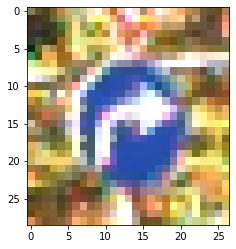

In [8]:
cropped = r"test/00003.png"
test_img = Image.open(cropped).convert('RGB')
plt.imshow(test_img)
test_img = test_img.resize((30,30))

tests = []
tests.append(np.array(test_img))
X = np.array(tests)

pred = np.argmax(model.predict(X))
print("El número de la señal de tránsito es: ", pred)